# Setup enviorment

In [1]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

# Epiweek
from epiweeks import Week, Year

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [3]:
dengue_cases = pd.read_csv('../Dengue_dataset/dengue_data_all_municipalities.csv')
dengue_cases

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,29,17,35,16,21,15,20,30,14,5
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,555,693,841,1003,1164,1275,1349,1334,...,0,0,0,0,0,0,0,0,0,0
1117,99001,Puerto Carreño,13742,14559,15346,16124,16934,17773,18635,19519,...,0,1,2,1,1,0,0,0,1,0
1118,99524,La Primavera,5190,5784,6365,6920,7496,8034,8617,9166,...,1,1,1,0,0,0,0,0,0,0
1119,99624,Santa Rosalía,3167,3378,3586,3846,4067,4325,4535,4635,...,0,0,0,0,0,0,0,0,0,0


# Calculate cases per inhabitants

In [4]:
def get_epiweek(name, date, end_date):
    
    # Get week
    week = name.split('/')[1]
    week = week.replace('w','')
    week = int(week)
    
    # Year
    year = name.split('/')[0]
    year = int(year)
    
    epiweek = Week(year, week)
    
    if date:
        if end_date:
            epiweek = epiweek.enddate()
        else:
            epiweek = epiweek.startdate()
    
    #print(epiweek)
    epiweek = str(epiweek)
    epiweek = int(epiweek)
    
    return epiweek

In [5]:
def get_dengue_cases(df, epiweek=True, date = True, end_date=True):
    
    data = df
    
    columns = ['Municipality code', 'Municipality']
    names = data[columns]
    
    cases = data.iloc[:,341:]
    # epiweek
    if epiweek:
        cases.columns = cases.columns.to_series().apply(get_epiweek, args=(date,end_date))
    
    # Merge:
    cases = pd.concat([names, cases], axis=1)
    
    return cases

In [6]:
def get_population(df):
    df
    
    columns = ['Municipality code', 'Municipality']
    names = df[columns]
    
    
    columns = []
    for column in df.columns:
        if 'Population2' in column:
            columns.append(column)
    population = df[columns]
    
    # Merge:
    population = pd.concat([names, population], axis=1)
    
    return population

    

In [7]:
def get_cases_per_inhabitants(df):
    
    cases = get_dengue_cases(df, epiweek=True, date = False, end_date=True)
    population = get_population(df)
    
    columns_cases = cases.columns
    columns_population = population.columns
    
    df = cases.merge(population, how='inner', on=['Municipality code', 'Municipality'])
    
    for column in columns_cases:
        if column in ['Municipality code', 'Municipality']:
            continue
        else:
            year = str(column)[:4]
            #print(f'column: {column}, year: {year}')
            df[column] = df[column]/df[f'Population{year}']
            
    df = df[columns_cases]
    return df

In [8]:
cases_per_inhabitants = get_cases_per_inhabitants(dengue_cases)
cases_per_inhabitants

,Municipality code,Municipality,200701,200702,200703,200704,200705,200706,200707,200708,...,201943,201944,201945,201946,201947,201948,201949,201950,201951,201952
0,5001,Medellín,4.374212e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000012,0.000007,0.000014,0.000006,0.000008,0.000006,0.000008,0.000012,0.000006,0.000002
1,5002,Abejorral,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5004,Abriaquí,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5021,Alejandría,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5030,Amagá,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000032,0.000032,0.000032,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1117,99001,Puerto Carreño,0.000000e+00,0.000073,0.000073,0.000146,0.000146,0.000073,0.0,0.0,...,0.000000,0.000049,0.000098,0.000049,0.000049,0.000000,0.000000,0.000000,0.000049,0.000000
1118,99524,La Primavera,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000102,0.000102,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1119,99624,Santa Rosalía,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Get mean cases per inhabitants

In [11]:
def get_mean_cases(df):
    
    dengue_epiweeks = df.columns[2:]
    names = ['Municipality code', 'Municipality']

    df['Mean_by_Municipality'] = df[dengue_epiweeks].sum(axis=1)/len(dengue_epiweeks)
    total_c = df[names + ['Mean_by_Municipality']]
    
    df.drop(columns=['Mean_by_Municipality'], inplace=True)
    
    mean = total_c.mean()['Mean_by_Municipality']
    
    print(f'The mean cases per inhabitant is: {mean}')
    return total_c, mean

In [12]:
total_cases_per_inhabitants, mean = get_mean_cases(cases_per_inhabitants)
total_cases_per_inhabitants

The mean cases per inhabitant is: 2.9663207278530664e-05


,Municipality code,Municipality,Mean_by_Municipality
0,5001,Medellín,0.000031
1,5002,Abejorral,0.000006
2,5004,Abriaquí,0.000005
3,5021,Alejandría,0.000004
4,5030,Amagá,0.000034
...,...,...,...
1116,97889,Yavaraté,0.000002
1117,99001,Puerto Carreño,0.000094
1118,99524,La Primavera,0.000067
1119,99624,Santa Rosalía,0.000092


In [25]:
total_cases_per_inhabitants.sort_values(by=['Mean_by_Municipality'], ascending=False)

,Municipality code,Municipality,Mean_by_Municipality
1050,81300,Fortul,0.000392
518,25488,Nilo,0.000333
372,19290,Florencia,0.000305
690,50150,Castilla La Nueva,0.000212
1055,85010,Aguazul,0.000207
...,...,...,...
306,15814,Toca,0.000000
304,15808,Tinjacá,0.000000
302,15804,Tibaná,0.000000
298,15776,Sutamarchán,0.000000


# Define an outbreak

In [13]:
def filter_df(df, municipality):
    df = df[df.Municipality == municipality]
    df = df.iloc[:,2:]
    return df.T

In [14]:
""" 
Function to plot the time series
"""
def plot_cases(df, municipalities, mean):
    
    plt.figure(figsize = (14, 8))
    
    for municipality in municipalities:
        df_aux = filter_df(df, municipality)
        plt.plot(df_aux.index, df_aux.iloc[:,0], label=municipality)
        
    plt.axhline(mean, color='r', label='mean in colombia')
    plt.axhspan(mean, 0, facecolor='r', alpha=0.5)
    
    plt.xlabel('Date') 
    plt.ylabel('Dengue Cases')
    plt.title('Dengue Cases')
    
    plt.legend()
    plt.show()

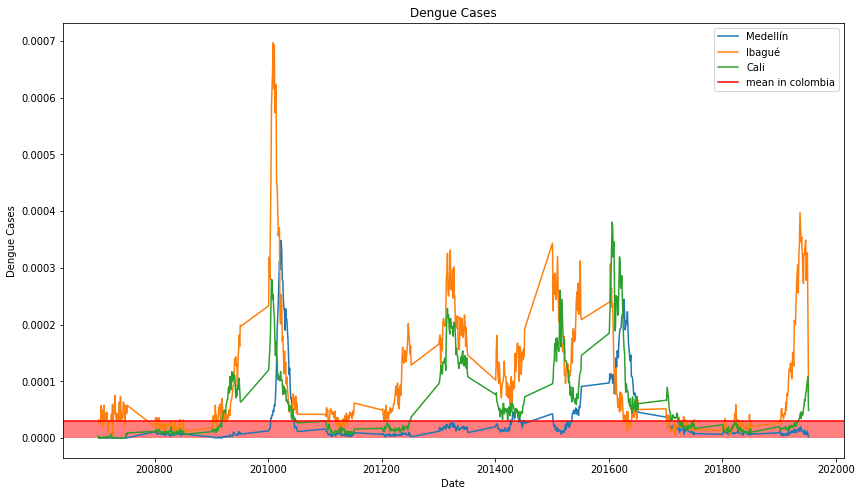

In [15]:
municipalities = ['Medellín', 'Ibagué', 'Cali']
plot_cases(cases_per_inhabitants, municipalities, mean)

The mean cases per inhabitant is: 1.304171571240809


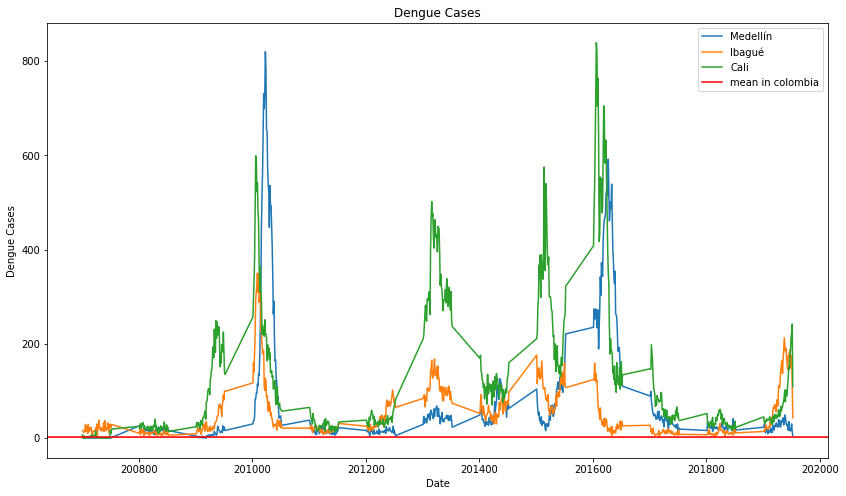

In [23]:
cases_count = get_dengue_cases(dengue_cases, epiweek=True, date = False, end_date=True)
total_cases, mean_cases = get_mean_cases(cases_count)
plot_cases(cases_count, municipalities, mean_cases)

In [24]:
total_cases.sort_values(by=['Mean_by_Municipality'], ascending=False)

,Municipality code,Municipality,Mean_by_Municipality
1005,76001,Cali,132.418639
0,5001,Medellín,73.294379
845,68001,Bucaramanga,57.423077
779,54001,Cúcuta,56.464497
958,73001,Ibagué,52.883136
...,...,...,...
362,19022,Almaguer,0.000000
238,15362,Iza,0.000000
237,15332,Güicán de La Sierra,0.000000
232,15296,Gámeza,0.000000


# Download Dataset

In [26]:
cases_per_inhabitants.to_csv('cases_per_inhabitants.csv', index=False)